# Ejercicio 1

**Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.**

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import SequentialFeatureSelector
import random

In [ ]:
import numpy as np

# Carga el archivo completo
data = np.loadtxt('sample_data/P1_2.txt')

# Separa la primera columna (clases)
clases = data[:, 0]

# Separa las variables (todas las columnas excepto la primera)
variables = data[:, 1:]

# Elimina la segunda columna de las variables
variables = np.delete(variables, 0, axis=1)

# Imprime las clases
print("Clases:")
print(clases)

# Imprime las variables
print("\nVariables:")
print(variables)
#

Clases:
[1. 1. 1. ... 2. 2. 2.]

Variables:
[[ 0.20471879  0.01482435 -0.09173746 ... -0.38403021  0.79797814
   0.89686051]
 [ 1.2522784   1.68169823  1.11239221 ...  0.40357021  0.4111649
   0.61222298]
 [ 0.07537733 -0.47761687 -1.04447446 ... -0.55188302 -1.23183724
  -1.14983922]
 ...
 [ 0.23655468  0.07490878  0.30015567 ... -0.73891858 -0.56288248
   0.01337943]
 [-0.6004833  -0.6521505  -0.07596957 ...  1.2057515   1.23724818
   0.80444006]
 [-0.99336043 -0.64687151 -0.0320592  ... -1.08128608 -0.19145452
   0.17883186]]


In [ ]:
unique, counts = np.unique(clases, return_counts=True)

# Muestra el conteo de cada clase
for clase, count in zip(unique, counts):
    print(f'Clase {clase}: {count} ejemplos')

# Calcula el porcentaje de cada clase
total = len(clases)
percentages = (counts / total) * 100
for clase, percentage in zip(unique, percentages):
    print(f'Clase {clase}: {percentage:.2f}% del total')


Clase 1.0: 284 ejemplos
Clase 2.0: 1706 ejemplos
Clase 1.0: 14.27% del total
Clase 2.0: 85.73% del total


Ya que hay una diferencia importante en los porcentajes de las clases, es necesario utilizar alguna estrategia para  mitigar el problema de tener una muestra desbalanceada, el blaanceo por sobremuestreo se llevara a cabo en cada paso durante la validación cruzada.

In [ ]:
# Definir los modelos a evaluar
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB()
}

# Configurar la validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Diccionario para almacenar los resultados de cada modelo
results = {}

# Evaluar cada modelo con validación cruzada y upsampling
for name, model in models.items():
    print(f"----- Evaluando: {name} -----")

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(variables, clases):
        # Fase de entrenamiento
        x_train = variables[train_index, :]
        y_train = clases[train_index]

        x1 = x_train[y_train == 1, :]
        y1 = y_train[y_train == 1]
        n1 = len(y1)

        x2 = x_train[y_train == 2, :]
        y2 = y_train[y_train == 2]
        n2 = len(y2)

        # Upsampling: seleccionamos muestras de la clase minoritaria (y1) para igualar la clase mayoritaria (y2)
        ind = random.choices([i for i in range(n1)], k=n2)

        x_sub = np.concatenate((x1[ind, :], x2), axis=0)
        y_sub = np.concatenate((y1[ind], y2), axis=0)

        # Entrenar el modelo con los datos balanceados
        model.fit(x_sub, y_sub)

        # Fase de prueba
        x_test = variables[test_index, :]
        y_test = clases[test_index]
        y_pred = model.predict(x_test)

        # Guardar los resultados
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    # Concatenar las predicciones y las etiquetas reales de todas las iteraciones
    y_test_concat = np.concatenate(cv_y_test)
    y_pred_concat = np.concatenate(cv_y_pred)

    # Calcular el accuracy y almacenar los resultados
    accuracy = accuracy_score(y_test_concat, y_pred_concat)
    results[name] = accuracy
    print(f'{name}: Accuracy = {accuracy:.4f}')

# Determinar el modelo más efectivo
best_model_name = max(results, key=results.get)
print(f'\nEl modelo más efectivo es {best_model_name} con una precisión de {results[best_model_name]:.4f}')


----- Evaluando: Logistic Regression -----


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: Accuracy = 0.8518
----- Evaluando: K-Nearest Neighbors -----
K-Nearest Neighbors: Accuracy = 0.7714
----- Evaluando: Support Vector Machine -----
Support Vector Machine: Accuracy = 0.8462
----- Evaluando: Decision Tree -----
Decision Tree: Accuracy = 0.8146
----- Evaluando: Random Forest -----
Random Forest: Accuracy = 0.8884
----- Evaluando: Gradient Boosting -----
Gradient Boosting: Accuracy = 0.8975
----- Evaluando: AdaBoost -----
AdaBoost: Accuracy = 0.8628
----- Evaluando: Naive Bayes -----
Naive Bayes: Accuracy = 0.8598

El modelo más efectivo es Gradient Boosting con una precisión de 0.8975


**Implementa desde cero el método de regresión logística, y evalúalo con el conjunto de datos.**

In [ ]:
# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de pérdida (log loss)
def compute_loss(y, y_hat):
    m = len(y)
    loss = -1/m * (np.dot(y, np.log(y_hat)) + np.dot((1-y), np.log(1-y_hat)))
    return loss

# Función para calcular el gradiente
def compute_gradient(X, y, y_hat):
    m = len(y)
    gradient = np.dot(X.T, (y_hat - y)) / m
    return gradient

# Implementación de la regresión logística desde cero
class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0
        self.losses = []

        for i in range(self.iterations):
            # Calcular la predicción
            y_hat = sigmoid(np.dot(X, self.weights) + self.bias)

            # Calcular la pérdida
            loss = compute_loss(y, y_hat)
            self.losses.append(loss)

            # Calcular el gradiente
            dw = compute_gradient(X, y, y_hat)
            db = np.sum(y_hat - y) / self.m

            # Actualizar los pesos y el sesgo
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        y_hat = sigmoid(np.dot(X, self.weights) + self.bias)
        y_pred = [1 if i > 0.5 else 0 for i in y_hat]
        return np.array(y_pred)

# Inicializar el modelo de regresión logística
model = LogisticRegressionFromScratch(learning_rate=0.01, iterations=1000)

# Configurar la validación cruzada (StratifiedKFold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

# Validación cruzada con upsampling
for train_index, test_index in kf.split(variables, clases):
    # Dividir en entrenamiento y prueba
    x_train = variables[train_index, :]
    y_train = clases[train_index]

    x1 = x_train[y_train == 1, :]
    y1 = y_train[y_train == 1]
    n1 = len(y1)

    x2 = x_train[y_train == 2, :]
    y2 = y_train[y_train == 2]
    n2 = len(y2)

    # Upsampling de la clase minoritaria
    ind = random.choices([i for i in range(n1)], k=n2)
    x_sub = np.concatenate((x1[ind, :], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    # Entrenar el modelo con los datos balanceados
    model.fit(x_sub, y_sub)

    # Fase de prueba
    x_test = variables[test_index, :]
    y_test = clases[test_index]
    y_pred = model.predict(x_test)

    # Calcular precisión
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Imprimir los resultados finales
print(f'Mean Accuracy = {np.mean(accuracies):.4f}, Std = {np.std(accuracies):.4f}')


Mean Accuracy = 0.1332, Std = 0.0036


<ipython-input-8-3a9af0de6d17>:8: RuntimeWarning: divide by zero encountered in log
  loss = -1/m * (np.dot(y, np.log(y_hat)) + np.dot((1-y), np.log(1-y_hat)))


**Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter.**

Usando KNeighborsClassifier

----- Feature selection using KNeighborsClassifier with Upsampling -----
              precision    recall  f1-score   support

         1.0       0.27      0.60      0.37       284
         2.0       0.92      0.74      0.82      1706

    accuracy                           0.72      1990
   macro avg       0.59      0.67      0.60      1990
weighted avg       0.82      0.72      0.75      1990

----- Optimal selection of number of features with Upsampling -----
---- n features = 1
ACC: 0.635175879396985
---- n features = 2
ACC: 0.6763819095477386
---- n features = 3
ACC: 0.685427135678392
---- n features = 4
ACC: 0.6869346733668342
---- n features = 5
ACC: 0.7246231155778895
---- n features = 6
ACC: 0.7005025125628139
---- n features = 7
ACC: 0.7261306532663317
---- n features = 8
ACC: 0.7376884422110553
---- n features = 9
ACC: 0.74321608040201
---- n features = 10
ACC: 0.7467336683417086
---- n features = 11
ACC: 0.7633165829145728
---- n features = 12
ACC: 0.7628140703517587
---- 

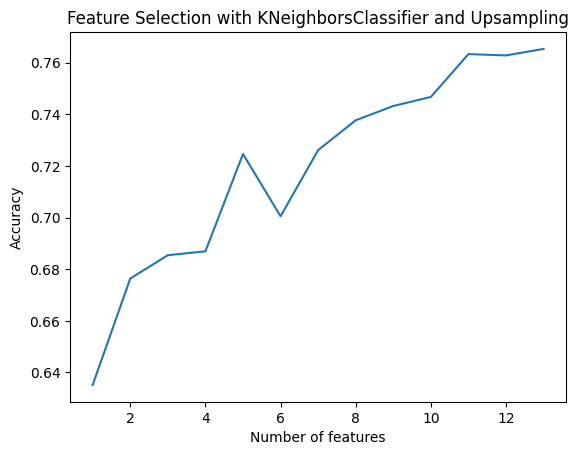

Selected features indices:  [11 12 15 19 20 21 27 28 29 30 31 69 70]


KNeighborsClassifier()

In [ ]:
import random
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

x = variables
y = clases

print("----- Feature selection using KNeighborsClassifier with Upsampling -----")

# Configurar la validación cruzada (StratifiedKFold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_y_test = []
cv_y_pred = []

# Validación cruzada con upsampling
for train_index, test_index in kf.split(x, y):
    # Fase de entrenamiento
    x_train = x[train_index, :]
    y_train = y[train_index]

    # Upsampling
    x1 = x_train[y_train == 1, :]
    y1 = y_train[y_train == 1]
    n1 = len(y1)

    x2 = x_train[y_train == 2, :]
    y2 = y_train[y_train == 2]
    n2 = len(y2)

    # Upsampling de la clase minoritaria
    ind = random.choices([i for i in range(n1)], k=n2)
    x_sub = np.concatenate((x1[ind, :], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    # Selección de características
    fselection = SelectKBest(f_classif, k=6)
    fselection.fit(x_sub, y_sub)
    x_train_transformed = fselection.transform(x_sub)

    # Entrenar el modelo
    clf = KNeighborsClassifier()
    clf.fit(x_train_transformed, y_sub)

    # Fase de prueba
    x_test = fselection.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

#------------------------------------------------------------------------------------------------------------------
# Encontrar el número óptimo de características usando validación cruzada con upsampling
#------------------------------------------------------------------------------------------------------------------

print("----- Optimal selection of number of features with Upsampling -----")

n_feats = list(range(1, 14))

acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    for train_index, test_index in kf.split(x, y):
        # Fase de entrenamiento
        x_train = x[train_index, :]
        y_train = y[train_index]

        # Upsampling
        x1 = x_train[y_train == 1, :]
        y1 = y_train[y_train == 1]
        n1 = len(y1)

        x2 = x_train[y_train == 2, :]
        y2 = y_train[y_train == 2]
        n2 = len(y2)

        # Upsampling de la clase minoritaria
        ind = random.choices([i for i in range(n1)], k=n2)
        x_sub = np.concatenate((x1[ind, :], x2), axis=0)
        y_sub = np.concatenate((y1[ind], y2), axis=0)

        # Selección de características
        fselection = SelectKBest(f_classif, k=n_feat)
        fselection.fit(x_sub, y_sub)
        x_train_transformed = fselection.transform(x_sub)

        # Entrenar el modelo
        clf = KNeighborsClassifier()
        clf.fit(x_train_transformed, y_sub)

        # Fase de prueba
        x_test = fselection.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf.predict(x_test)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

# Graficar la precisión en función del número de características
plt.plot(n_feats, acc_nfeat)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("Feature Selection with KNeighborsClassifier and Upsampling")
plt.show()

# Ajustar el modelo con el número óptimo de características
clf = KNeighborsClassifier()
fselection = SelectKBest(f_classif, k=opt_features)
fselection.fit(x, y)

print("Selected features indices: ", fselection.get_support(indices=True))

x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)


**Repite el paso anterior, pero para un método de selección de características secuencial.**

Usando KNeighborsClassifier

----- Feature selection using 50% of predictors with SequentialFeatureSelector and Upsampling -----
              precision    recall  f1-score   support

         1.0       0.40      0.56      0.47       284
         2.0       0.92      0.86      0.89      1706

    accuracy                           0.82      1990
   macro avg       0.66      0.71      0.68      1990
weighted avg       0.85      0.82      0.83      1990

----- Optimal selection of number of features with Upsampling -----
---- n features = 1
ACC: 0.6432160804020101
---- n features = 2
ACC: 0.685427135678392
---- n features = 3
ACC: 0.6909547738693467
---- n features = 4
ACC: 0.7361809045226131
---- n features = 5
ACC: 0.7170854271356785
---- n features = 6
ACC: 0.756281407035176
---- n features = 7
ACC: 0.7743718592964824
---- n features = 8
ACC: 0.764321608040201
---- n features = 9
ACC: 0.764824120603015
---- n features = 10
ACC: 0.7849246231155779
---- n features = 11
ACC: 0.785427135678392
---- n features = 12
ACC

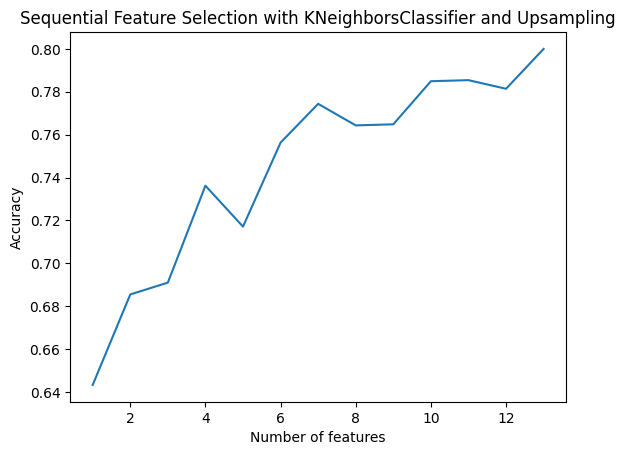

Selected features indices:  [  9  12  16  21  22  43  70  79  98 116 118 131 136]


KNeighborsClassifier()

In [ ]:
import random
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

x = variables
y = clases

print("----- Feature selection using 50% of predictors with SequentialFeatureSelector and Upsampling -----")

# Configurar la validación cruzada (StratifiedKFold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_y_test = []
cv_y_pred = []

# Validación cruzada con upsampling
for train_index, test_index in kf.split(x, y):
    # Fase de entrenamiento
    x_train = x[train_index, :]
    y_train = y[train_index]

    # Upsampling
    x1 = x_train[y_train == 1, :]
    y1 = y_train[y_train == 1]
    n1 = len(y1)

    x2 = x_train[y_train == 2, :]
    y2 = y_train[y_train == 2]
    n2 = len(y2)

    # Upsampling de la clase minoritaria
    ind = random.choices([i for i in range(n1)], k=n2)
    x_sub = np.concatenate((x1[ind, :], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    # Selección de características secuencial
    clf = KNeighborsClassifier()
    fselection = SequentialFeatureSelector(clf, n_features_to_select=0.5)
    fselection.fit(x_sub, y_sub)
    x_train_transformed = fselection.transform(x_sub)

    # Entrenar el modelo
    clf.fit(x_train_transformed, y_sub)

    # Fase de prueba
    x_test = fselection.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

#------------------------------------------------------------------------------------------------------------------
# Encontrar el número óptimo de características usando validación cruzada con upsampling
#------------------------------------------------------------------------------------------------------------------

print("----- Optimal selection of number of features with Upsampling -----")

n_feats = list(range(1, 14))  # Ajusta el rango según el número de características disponibles

acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    for train_index, test_index in kf.split(x, y):
        # Fase de entrenamiento
        x_train = x[train_index, :]
        y_train = y[train_index]

        # Upsampling
        x1 = x_train[y_train == 1, :]
        y1 = y_train[y_train == 1]
        n1 = len(y1)

        x2 = x_train[y_train == 2, :]
        y2 = y_train[y_train == 2]
        n2 = len(y2)

        # Upsampling de la clase minoritaria
        ind = random.choices([i for i in range(n1)], k=n2)
        x_sub = np.concatenate((x1[ind, :], x2), axis=0)
        y_sub = np.concatenate((y1[ind], y2), axis=0)

        # Selección de características secuencial
        clf = KNeighborsClassifier()
        fselection = SequentialFeatureSelector(clf, n_features_to_select=n_feat)
        fselection.fit(x_sub, y_sub)
        x_train_transformed = fselection.transform(x_sub)

        # Entrenar el modelo
        clf.fit(x_train_transformed, y_sub)

        # Fase de prueba
        x_test = fselection.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf.predict(x_test)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

# Graficar la precisión en función del número de características
plt.plot(n_feats, acc_nfeat)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("Sequential Feature Selection with KNeighborsClassifier and Upsampling")
plt.show()

# Ajustar el modelo con el número óptimo de características
clf = KNeighborsClassifier()
fselection = SequentialFeatureSelector(clf, n_features_to_select=opt_features)
fselection.fit(x, y)

print("Selected features indices: ", fselection.get_support(indices=True))

x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)


Repite el paso 4, pero para un método de selección de características recursivo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import RFE
import random

# Función para hacer upsampling
def upsample(X, y):
    x1 = X[y == 1, :]
    y1 = y[y == 1]
    x2 = X[y == 2, :]
    y2 = y[y == 2]

    n1 = len(y1)
    n2 = len(y2)

    if n1 < n2:
        ind = random.choices(range(n1), k=n2)
        X_balanced = np.concatenate((x1[ind, :], x2), axis=0)
        y_balanced = np.concatenate((y1[ind], y2), axis=0)
    else:
        ind = random.choices(range(n2), k=n1)
        X_balanced = np.concatenate((x1, x2[ind, :]), axis=0)
        y_balanced = np.concatenate((y1, y2[ind]), axis=0)

    return X_balanced, y_balanced

#------------------------------------------------------------------------------------------------------------------
#   Recursive Feature Selection
#------------------------------------------------------------------------------------------------------------------

print("----- Recursive Feature Selection -----")

# Configurar validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Para almacenar los resultados
cv_y_test = []
cv_y_pred = []

# Evaluar diferentes números de características
n_feats = list(range(1, variables.shape[1] + 1))
acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    for train_index, test_index in kf.split(variables, clases):

        # Fase de entrenamiento
        X_train, y_train = variables[train_index], clases[train_index]
        X_test, y_test = variables[test_index], clases[test_index]

        # Hacer upsampling en los datos de entrenamiento
        X_train_balanced, y_train_balanced = upsample(X_train, y_train)

        # Configurar RFE
        clf = SVC(kernel='linear')
        fselection = RFE(clf, n_features_to_select=n_feat)
        fselection.fit(X_train_balanced, y_train_balanced)
        X_train_transformed = fselection.transform(X_train_balanced)

        clf.fit(X_train_transformed, y_train_balanced)

        # Fase de prueba
        X_test_transformed = fselection.transform(X_test)
        y_pred = clf.predict(X_test_transformed)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    print('ACC:', acc)

# Encontrar el número óptimo de características
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("Recursive Feature Selection with KNeighborsClassifier")
plt.show()

# Ajustar el modelo con el número óptimo de características
clf = SVC(kernel='linear')
fselection = RFE(clf, n_features_to_select=opt_features)
fselection.fit(variables, clases)

print("Selected features indices: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(variables)
clf.fit(x_transformed, clases)

# Evaluar el modelo final usando validación cruzada con upsampling
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(variables, clases):

    # Fase de entrenamiento
    X_train, y_train = variables[train_index], clases[train_index]
    X_test, y_test = variables[test_index], clases[test_index]

    # Hacer upsampling en los datos de entrenamiento
    X_train_balanced, y_train_balanced = upsample(X_train, y_train)

    # Configurar RFE
    X_train_transformed = fselection.transform(X_train_balanced)
    clf.fit(X_train_transformed, y_train_balanced)

    # Fase de prueba
    X_test_transformed = fselection.transform(X_test)
    y_pred = clf.predict(X_test_transformed)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Recursive Feature Selection -----
---- n features = 1
ACC: 0.6346733668341709
---- n features = 2


KeyboardInterrupt: 

Escoge alguna de las técnicas de selección de características que probaste con anteioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:
Aplica el método de selección de características con todos los datos.
Ajusta el modelo con las características encontradas.

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Función para hacer upsampling
def upsample(X, y):
    x1 = X[y == 1, :]
    y1 = y[y == 1]
    x2 = X[y == 2, :]
    y2 = y[y == 2]

    n1 = len(y1)
    n2 = len(y2)

    if n1 < n2:
        ind = np.random.choice(n1, n2, replace=True)
        X_balanced = np.concatenate((x1[ind, :], x2), axis=0)
        y_balanced = np.concatenate((y1[ind], y2), axis=0)
    else:
        ind = np.random.choice(n2, n1, replace=True)
        X_balanced = np.concatenate((x1, x2[ind, :]), axis=0)
        y_balanced = np.concatenate((y1, y2[ind]), axis=0)

    return X_balanced, y_balanced

# Encontrar el número óptimo de características usando validación cruzada
print("----- Finding Optimal Number of Features -----")

n_feats = list(range(1, variables.shape[1] + 1))
acc_nfeat = []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    for train_index, test_index in kf.split(variables, clases):

        X_train, y_train = variables[train_index], clases[train_index]
        X_test, y_test = variables[test_index], clases[test_index]

        # Hacer upsampling en los datos de entrenamiento
        X_train_balanced, y_train_balanced = upsample(X_train, y_train)

        # Configurar RFE
        clf_cv = SVC(kernel='linear')
        fselection_cv = RFE(clf_cv, n_features_to_select=n_feat)
        fselection_cv.fit(X_train_balanced, y_train_balanced)
        X_train_transformed = fselection_cv.transform(X_train_balanced)

        clf_cv.fit(X_train_transformed, y_train_balanced)

        # Fase de prueba
        X_test_transformed = fselection_cv.transform(X_test)
        y_pred = clf_cv.predict(X_test_transformed)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("Recursive Feature Selection with SVC")
plt.show()

#------------------------------------------------------------------------------------------------------------------
# Ajustar el modelo con el número óptimo de características
#------------------------------------------------------------------------------------------------------------------

print("----- Fitting the model with Optimal Number of Features -----")

# Selección de características final
clf = SVC(kernel='linear')
fselection = RFE(clf, n_features_to_select=opt_features)
fselection.fit(variables, clases)

print("Selected features indices: ", fselection.get_support(indices=True))

# Transformar los datos con las características seleccionadas
x_transformed = fselection.transform(variables)
clf.fit(x_transformed, clases)

# Evaluar el modelo final usando validación cruzada con upsampling
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(variables, clases):

    # Fase de entrenamiento
    X_train, y_train = variables[train_index], clases[train_index]
    X_test, y_test = variables[test_index], clases[test_index]

    # Hacer upsampling en los datos de entrenamiento
    X_train_balanced, y_train_balanced = upsample(X_train, y_train)

    # Configurar RFE
    X_train_transformed = fselection.transform(X_train_balanced)
    clf.fit(X_train_transformed, y_train_balanced)

    # Fase de prueba
    X_test_transformed = fselection.transform(X_test)
    y_pred = clf.predict(X_test_transformed)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- Finding Optimal Number of Features -----
---- n features = 1


KeyboardInterrupt: 

**¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?**

Si no se considera el desbalanceo de clases en un conjunto de datos, el modelo puede inclinarse hacia la clase mayoritaria. Esto ocurre porque los clasificadores tienden a predecir la clase mayoritaria con mayor frecuencia, dado que hay más ejemplos de esa clase.

**De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.**

Regresión Logística: Es simple y efectivo para problemas de clasificación binaria y puede ser adecuado si se ajusta el umbral de decisión para abordar el desbalanceo. Es interpretativa y funciona bien en problemas lineales.

Árboles de Decisión: Estos modelos son interpretables y pueden capturar relaciones no lineales entre las características y las clases. Además, pueden manejar desbalanceo si se ajustan con técnicas como el peso de las clases.

Random Forest: Una extensión de los árboles de decisión que reduce la varianza y mejora la precisión mediante el uso de múltiples árboles. Puede manejar desbalanceo ajustando el peso de las clases.

**¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?**

Si es posible, depende de la cantidad de redundancia y ruido en las características originales.
Reducir la dimensionalidad sirve para mejorar la interpretabilidad y reducir el tiempo de entrenamiento, pero se tiene que mantener suficiente información relevante para el modelo.

**¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?**

Para este caso, el método de selección de características recursiva con un clasificador como SVM o regresión logística parecen ser adecuados. Dan los mejores resultados.

**Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?**

Podemos hacer una optimización de Hiperparámetros mediante  una búsqueda exhaustiva o aleatoria de hiperparámetros para encontrar la configuración óptima del modelo.